In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Some EDA

In [5]:
flight_df= pd.read_csv(os.path.join('..' , 'data', 'raw', 'direct_flights_to_uk_mar_23.csv'))
flight_df

,Time series,Dep IATA Country Name,Dep Region Name,Dep City Name,Dep Airport Name,Local Dep Time,Arr IATA Country Name,Arr Region Name,Arr City Name,Arr Airport Name,Local Arr Time,Local Arr Day,Seats (Total),International/Domestic,Carrier Name,Flight No,Arr Terminal,GCD (km)
0,2023-03-01,Albania,Europe : Eastern/Central Europe,Tirana,Tirana,2015,United Kingdom,Europe : Western Europe,London (GB),London Luton Apt,2235,0,239,International,Wizz Air UK,4488,0,1912
1,2023-03-01,Albania,Europe : Eastern/Central Europe,Tirana,Tirana,1440,United Kingdom,Europe : Western Europe,London (GB),London Heathrow Apt,1650,0,172,International,British Airways,381,3,1896
2,2023-03-01,Albania,Europe : Eastern/Central Europe,Tirana,Tirana,1045,United Kingdom,Europe : Western Europe,London (GB),London Stansted Apt,1245,0,159,International,Air Albania,6001,0,1878
3,2023-03-01,Albania,Europe : Eastern/Central Europe,Tirana,Tirana,1150,United Kingdom,Europe : Western Europe,London (GB),London Luton Apt,1410,0,239,International,Wizz Air UK,4466,0,1912
4,2023-03-01,Algeria,Africa : North Africa,Algiers,Algiers,1400,United Kingdom,Europe : Western Europe,London (GB),London Heathrow Apt,1545,0,172,International,British Airways,311,3,1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72249,2023-03-31,United Kingdom,Europe : Western Europe,Southampton,Southampton,1625,United Kingdom,Europe : Western Europe,Alderney,Alderney,1705,0,19,Domestic,Aurigny Air Services,508,0,151
72250,2023-03-31,United Kingdom,Europe : Western Europe,London (GB),London Stansted Apt,1800,United Kingdom,Europe : Western Europe,Belfast,Belfast International Apt,1915,0,156,Domestic,Easyjet,42,0,526
72251,2023-03-31,United Kingdom,Europe : Western Europe,London (GB),London Stansted Apt,1830,United Kingdom,Europe : Western Europe,Belfast,Belfast International Apt,1955,0,189,Domestic,Ryanair UK Ltd,131,0,526
72252,2023-03-31,United Kingdom,Europe : Western Europe,Wick,Wick,1145,United Kingdom,Europe : Western Europe,Aberdeen (GB),Aberdeen (GB),1225,0,29,Domestic,Eastern Airways,562,0,148


In [3]:
flight_df.describe()

,Local Dep Time,Local Arr Time,Local Arr Day,Seats (Total),Flight No,GCD (km)
count,72254.000000,72254.000000,72254.000000,72254.000000,72254.000000,72254.000000
mean,1412.540261,1453.416475,0.089282,173.989966,2455.762532,1812.549478
std,493.199165,508.826522,0.285153,73.256451,2789.874858,2226.373410
min,1.000000,5.000000,0.000000,9.000000,1.000000,0.000000
25%,1025.000000,1035.000000,0.000000,156.000000,439.000000,496.000000
50%,1435.000000,1450.000000,0.000000,186.000000,1164.000000,977.000000
75%,1825.000000,1900.000000,0.000000,189.000000,3604.000000,1894.000000
max,2355.000000,2359.000000,1.000000,615.000000,9968.000000,17009.000000


In [4]:
# no missing values
np.sum(flight_df.isnull())

Time series               0
Dep IATA Country Name     0
Dep Region Name           0
Dep City Name             0
Dep Airport Name          0
Local Dep Time            0
Arr IATA Country Name     0
Arr Region Name           0
Arr City Name             0
Arr Airport Name          0
Local Arr Time            0
Local Arr Day             0
Seats (Total)             0
International/Domestic    0
Carrier Name              0
Flight No                 0
Arr Terminal              0
GCD (km)                  0
dtype: int64

In [5]:
# all flights come into UK
flight_df.groupby('Arr IATA Country Name').count()

,Time series,Dep IATA Country Name,Dep Region Name,Dep City Name,Dep Airport Name,Local Dep Time,Arr Region Name,Arr City Name,Arr Airport Name,Local Arr Time,Local Arr Day,Seats (Total),International/Domestic,Carrier Name,Flight No,Arr Terminal,GCD (km)
Arr IATA Country Name,,,,,,,,,,,,,,,,,
United Kingdom,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254,72254


<AxesSubplot:xlabel='Dep IATA Country Name', ylabel='Number of direct flights to UK'>

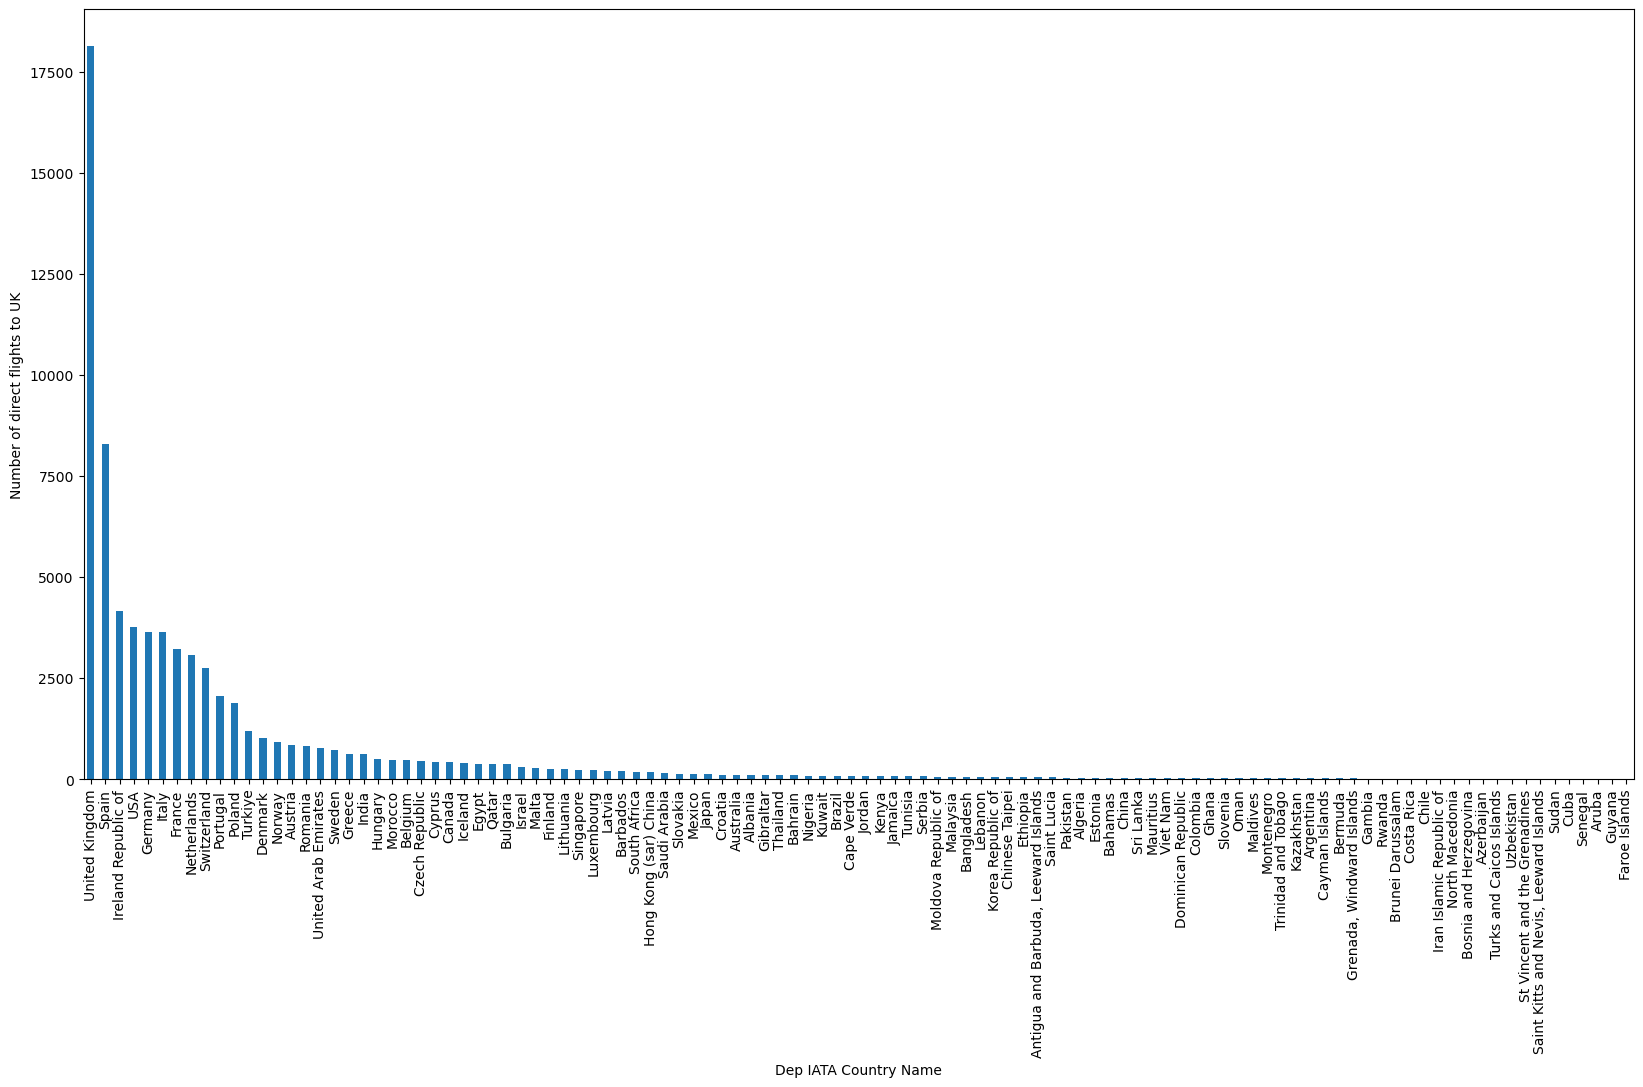

In [6]:
# Alot of flights are internal into the UK, but plenty of other countries
flight_df.groupby('Dep IATA Country Name')['Time series'].count().sort_values(ascending=False).plot(kind='bar', ylabel='Number of direct flights to UK',figsize = (20, 10))

<AxesSubplot:xlabel='Dep IATA Country Name', ylabel='Number of seats on direct flights to UK'>

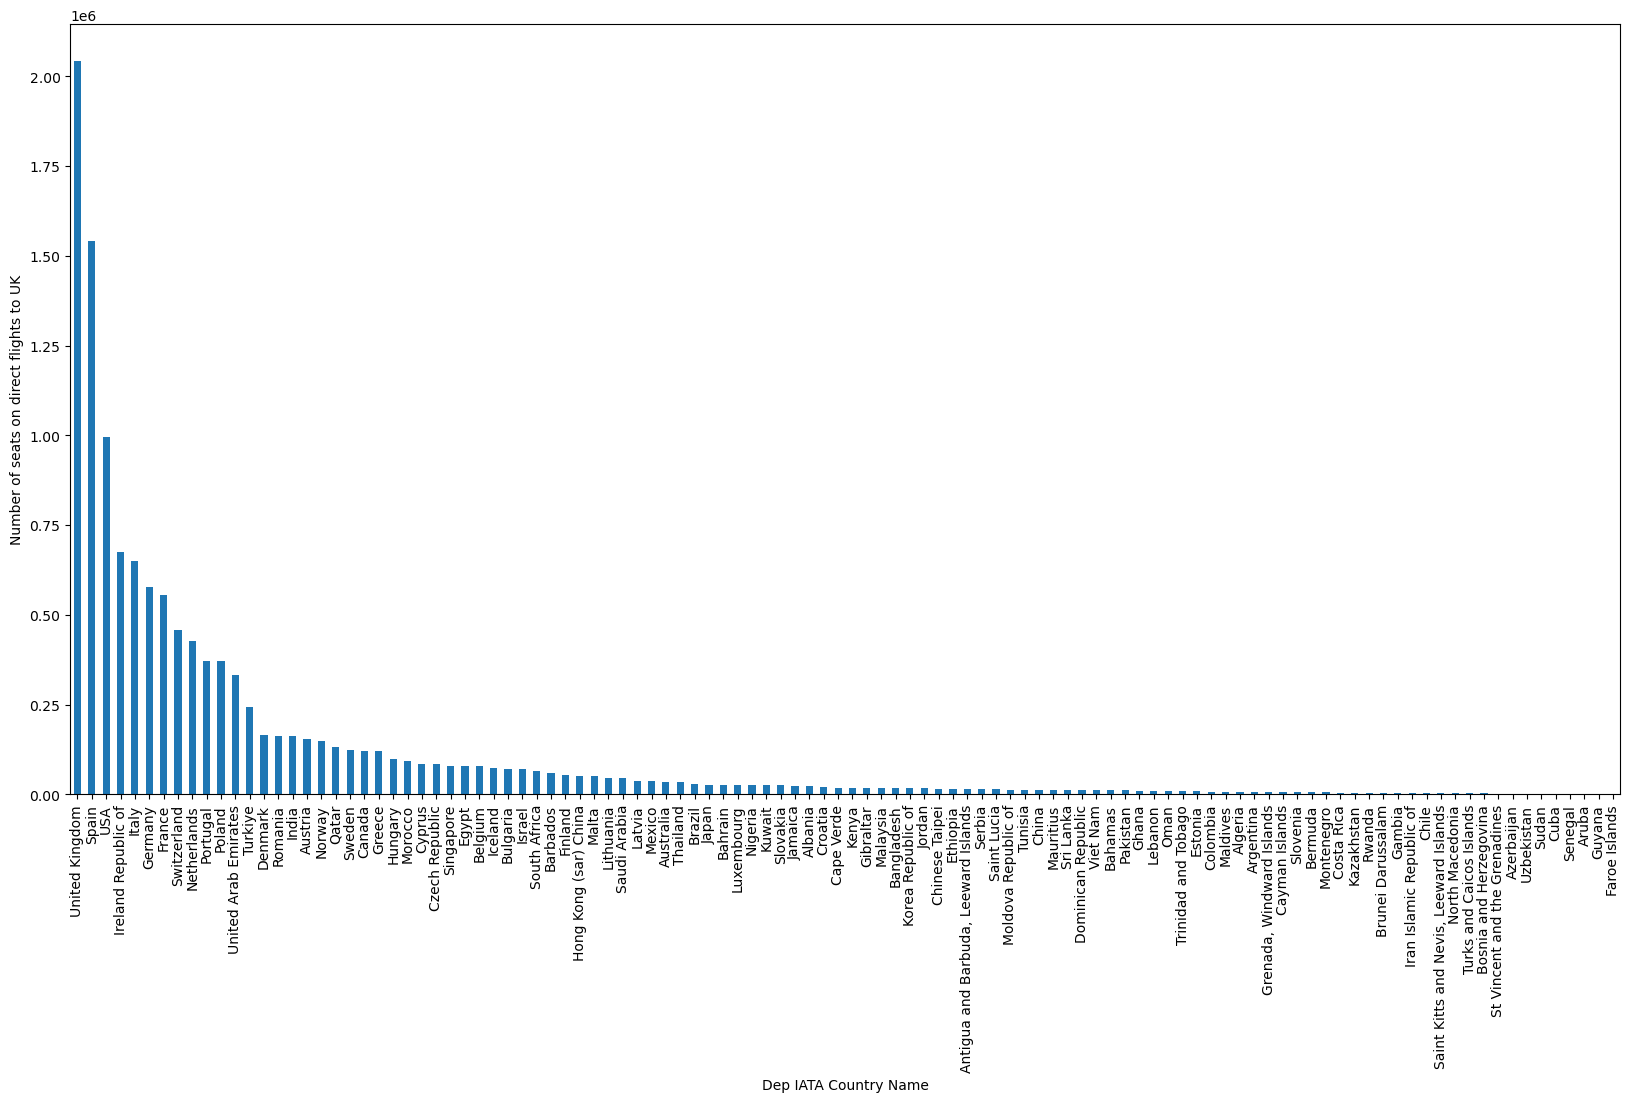

In [7]:
# Alot of flights are internal into the UK, but plenty of other countries
flight_df.groupby('Dep IATA Country Name')['Seats (Total)'].sum().sort_values(ascending=False).plot(kind='bar', ylabel='Number of seats on direct flights to UK',figsize = (20, 10))

# Plot by population and number of seats to the UK


In [8]:
final_df =  pd.read_csv(os.path.join('..' , 'data', 'processed', 'country_flights.csv'))

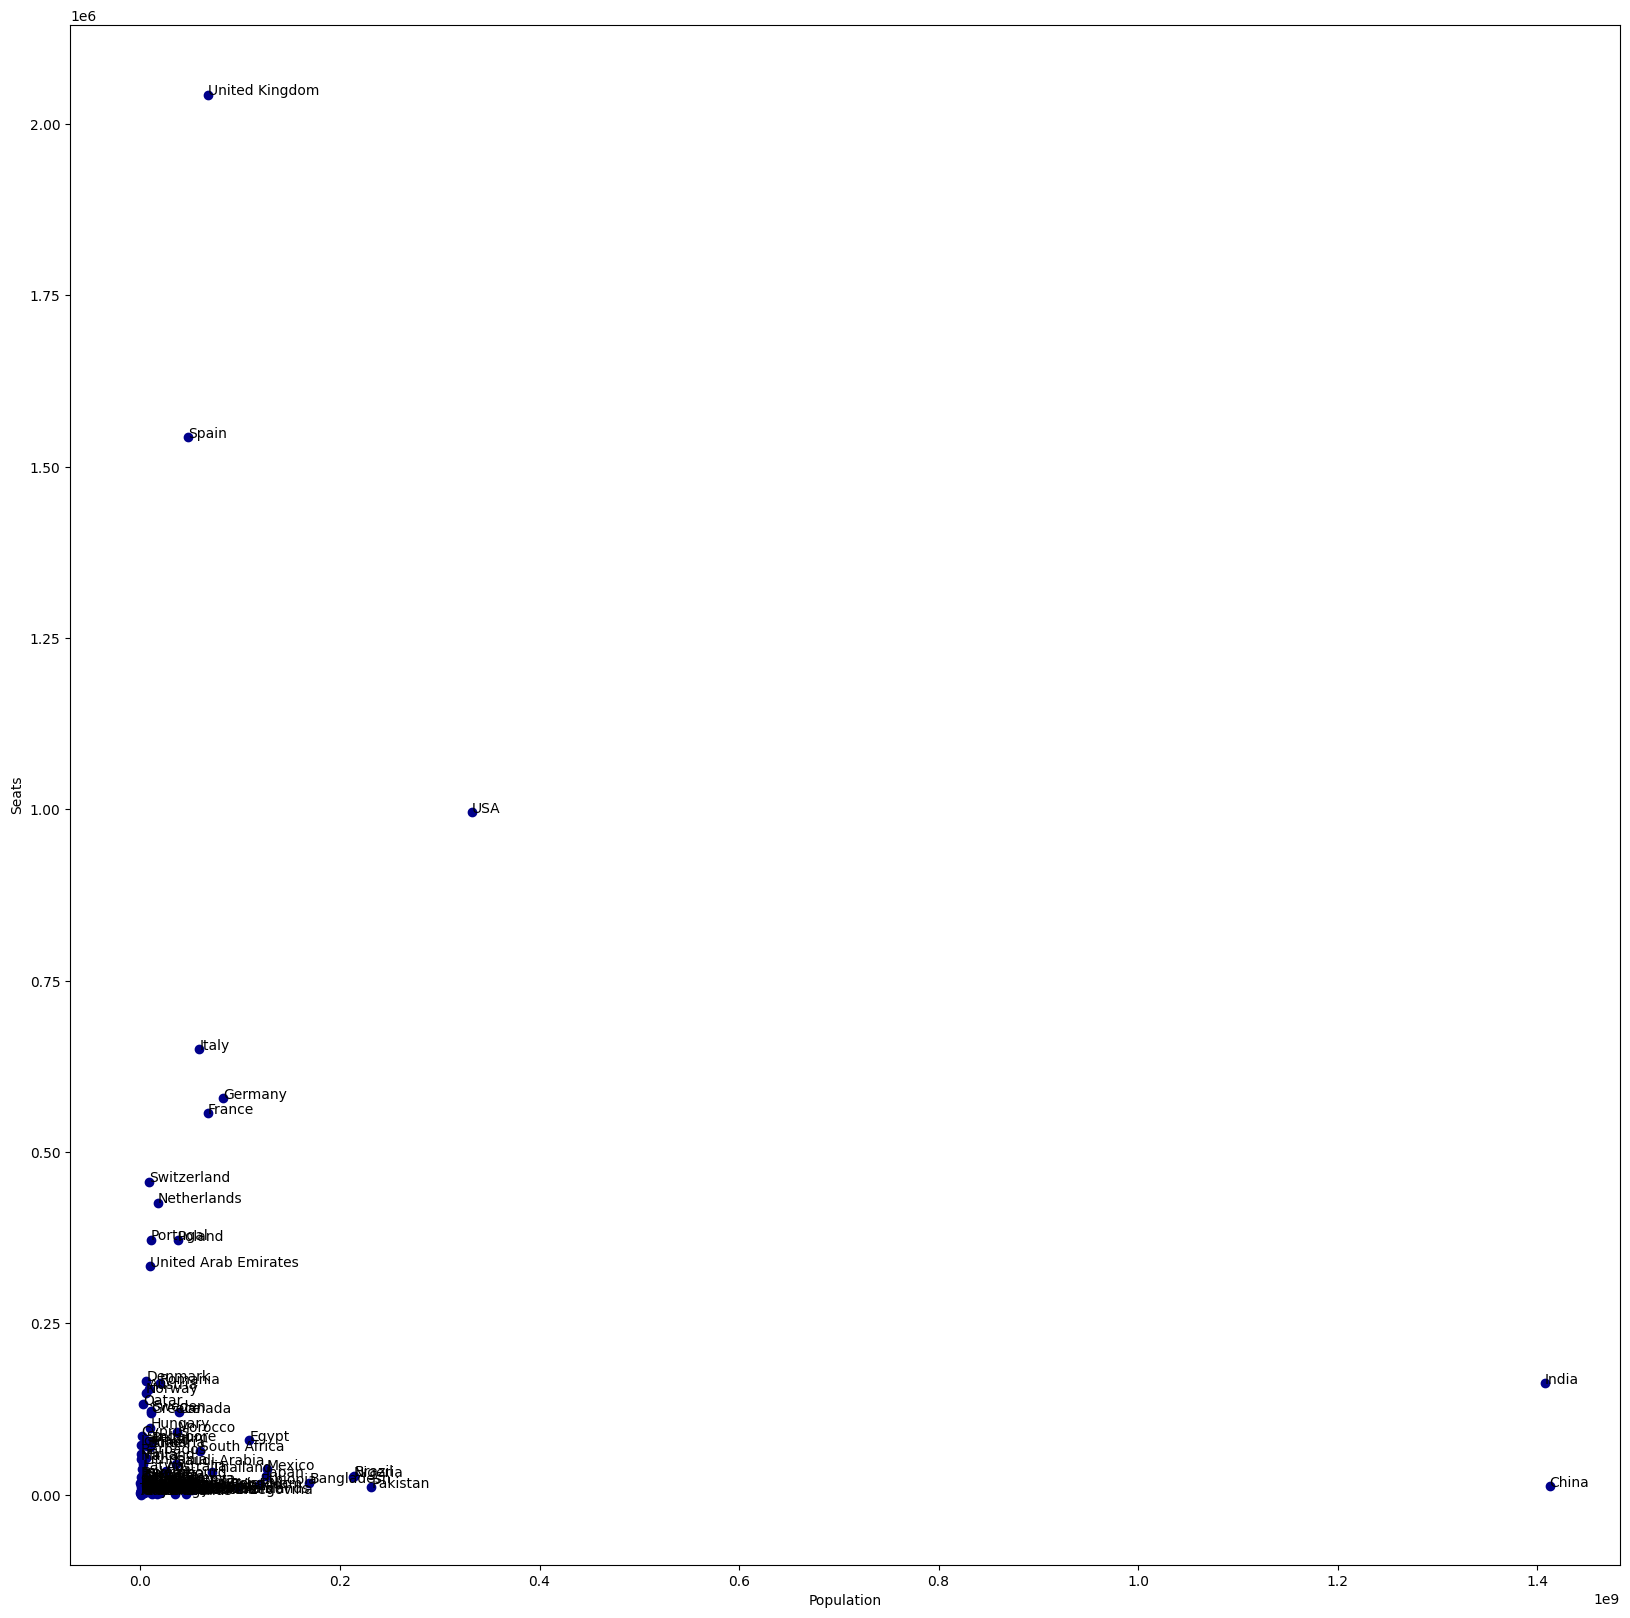

In [9]:
# open figure + axis
fig, ax = plt.subplots(figsize = (20,20))
# plot
ax.scatter(x=final_df['Population'],y=final_df['Seats'],c='DarkBlue')
# set labels
ax.set_xlabel('Population')
ax.set_ylabel('Seats')

# annotate points in axis
for idx, row in final_df.iterrows():
    ax.annotate(row['Name'], (row['Population'], row['Seats']) )
# force matplotlib to draw the graph
plt.show()